In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from os import path
import sys


repo_path= path.dirname(path.dirname(path.abspath("__file__")))
sys.path.append(repo_path)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

from collections import deque

from src.ac_agent import AgentDDPG, OUNoise, GaussianProcess
from src.utils import get_noise_schedulling

In [4]:
action_size = 1 
random_seed = 123

In [5]:
ou_nouse = OUNoise(action_size, random_seed)

In [6]:
ou_nouse.sample()

array([0.01047272])

In [15]:
ou_noise1 = OUNoise(action_size, random_seed)
ou_noise2 = OUNoise(action_size, random_seed, mu=0., theta=0.15, sigma=0.2)

In [8]:
ou_noise1_df1 = get_noise_schedulling(5000, decay=0.999, noise=ou_noise1)
ou_noise1_df2 = get_noise_schedulling(5000, decay=0.9998, noise=ou_noise1)
ou_noise1_df3 = get_noise_schedulling(5000, decay=0.9995, noise=ou_noise1)

ou_noise1_df = pd.concat([ou_noise1_df1, ou_noise1_df2, ou_noise1_df3], axis=0)

In [16]:
ou_noise2_df1 = get_noise_schedulling(5000, decay=0.999, noise=ou_noise2)
ou_noise2_df2 = get_noise_schedulling(5000, decay=0.9998, noise=ou_noise2)
ou_noise2_df3 = get_noise_schedulling(5000, decay=0.9995, noise=ou_noise2)

ou_noise2_df = pd.concat([ou_noise2_df1, ou_noise2_df2, ou_noise2_df3], axis=0)

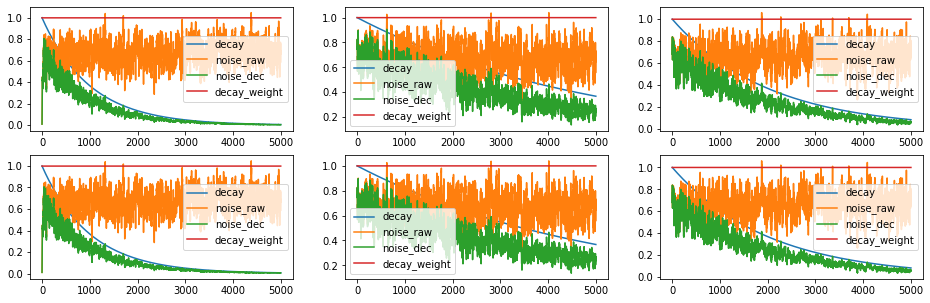

In [25]:
fig, axs = plt.subplots(2, 3, figsize=(16,5))

ou_noise1_df1.plot(ax=axs[0,0])
ou_noise1_df2.plot(ax=axs[0,1])
ou_noise1_df3.plot(ax=axs[0,2])

ou_noise2_df1.plot(ax=axs[1,0])
ou_noise2_df2.plot(ax=axs[1,1])
ou_noise2_df3.plot(ax=axs[1,2])

plt.show()

In [27]:
g_noise1 = GaussianProcess(action_size, random_seed,  mu=0., sigma=0.1)
g_noise2 = GaussianProcess(action_size, random_seed, mu=0., sigma=0.2)

In [28]:
g_noise1_df1 = get_noise_schedulling(5000, decay=0.999, noise=g_noise1)
g_noise1_df2 = get_noise_schedulling(5000, decay=0.9998, noise=g_noise1)
g_noise1_df3 = get_noise_schedulling(5000, decay=0.9995, noise=g_noise1)

g_noise1_df = pd.concat([g_noise1_df1, g_noise1_df2, g_noise1_df3], axis=0)

In [29]:
g_noise2_df1 = get_noise_schedulling(5000, decay=0.999, noise=g_noise2)
g_noise2_df2 = get_noise_schedulling(5000, decay=0.9998, noise=g_noise2)
g_noise2_df3 = get_noise_schedulling(5000, decay=0.9995, noise=g_noise2)

g_noise2_df = pd.concat([g_noise2_df1, g_noise2_df2, g_noise2_df3], axis=0)

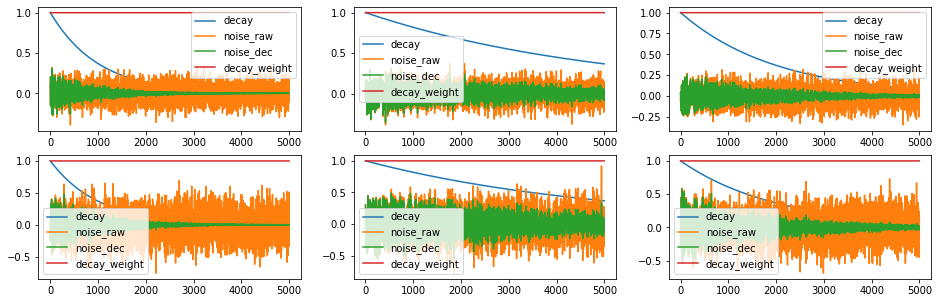

In [30]:
fig, axs = plt.subplots(2, 3, figsize=(16,5))

g_noise1_df1.plot(ax=axs[0,0])
g_noise1_df2.plot(ax=axs[0,1])
g_noise1_df3.plot(ax=axs[0,2])

g_noise2_df1.plot(ax=axs[1,0])
g_noise2_df2.plot(ax=axs[1,1])
g_noise2_df3.plot(ax=axs[1,2])

plt.show()

In [ ]:
ou_noise1_schedulling['noise_raw'].rolling(100).std().plot(label='ou')
g_noise_schedulling['noise_raw'].rolling(100).std().plot(label='gaussian')
plt.legend()
plt.show()

In [ ]:
(ou_noise1_schedulling['noise_raw'].rolling(100).mean()-0.6).plot(label='ou') 
g_noise_schedulling['noise_raw'].rolling(100).mean().plot(label='gaussian')
plt.legend()
plt.show()